# Heather's Anomaly Detection Project Notebook
by Heather Ortega McMillan

This is the initial notebook compiled by Heather. For full project details see the Final Notebook

In [5]:
import pandas as pd
import numpy as np

from acquire import get_joined_curriculum_data

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_joined_curriculum_data()

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
    - cohort pulled from the sql table 
    - sort all the endpoints 
    
7. Which lessons are least accessed?
    - kind of related to 2

LUPE ^^^^ 

### Question I'm tackling 
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
    - divided web dev and data science (4 different programs)
    - sort all the endpoints 
    - counts of cohorts accessing same endpoints
    

    

### Program ID Key 
1 - Full stack PHP

2 - Java

3 - Data Science

4 - Front End Program


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018810 entries, 0 to 1018809
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   date        1018810 non-null  object 
 1   endpoint    1018810 non-null  object 
 2   user_id     1018810 non-null  int64  
 3   cohort_id   1018810 non-null  float64
 4   source_ip   1018810 non-null  object 
 5   id          1018810 non-null  float64
 6   name        1018810 non-null  object 
 7   start_date  1018810 non-null  object 
 8   end_date    1018810 non-null  object 
 9   program_id  1018810 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 85.5+ MB


In [10]:
# deal with nulls by filling with 0s
#df.cohort_id.value_counts(dropna=False)

In [ ]:
# Fill nulls
def fill_nulls(df):
    '''
    This function fills the nulls in the joined curriculum log data
    '''
    df = df.fillna(value = 0)
    
    return df 
    

In [20]:
df = df.fillna(value = 0)

In [28]:
df[df.name == 0]

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
411,2018-01-26,/,48,0.0,97.105.19.61,0,0,0,0.0
412,2018-01-26,spring/extra-features/form-validation,48,0.0,97.105.19.61,0,0,0,0.0
425,2018-01-26,/,48,0.0,97.105.19.61,0,0,0,0.0
435,2018-01-26,/,48,0.0,97.105.19.61,0,0,0,0.0
436,2018-01-26,mysql/relationships/joins,48,0.0,97.105.19.61,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
1018759,2021-07-15,python/intro-to-numpy,1026,165.0,24.242.17.211,0,0,0,0.0
1018778,2021-07-15,python/intro-to-numpy,1051,165.0,209.182.242.80,0,0,0,0.0
1018785,2021-07-15,python/intro-to-numpy,1037,165.0,173.174.155.221,0,0,0,0.0
1018786,2021-07-15,python/intro-to-numpy,1041,165.0,70.235.249.134,0,0,0,0.0


#### Takeaways
- Newer people with no cohort id must be from Germaine and the Web Dev cohorts that just started

In [ ]:
# Is there a cohort that referred to a lesson significantly more than other cohorts seemed to 
# gloss over?


# See Lessons (endpoint) Count of each cohort access 

df['endpoint', 'cohort']



In [31]:
df[['name', 'cohort_id']].value_counts()

name        cohort_id
Staff       28.0         96954
0           0.0          53497
Ceres       33.0         40858
Jupiter     62.0         39316
Zion        29.0         38198
Fortuna     53.0         37043
Voyageurs   24.0         35707
Deimos      51.0         35381
Ganymede    57.0         34919
Apex        56.0         34172
Marco       135.0        34093
Darden      59.0         32871
Teddy       22.0         31258
Hyperion    58.0         30137
Betelgeuse  32.0         29754
Ulysses     23.0         28581
Europa      52.0         28177
Xanadu      26.0         27811
Bayes       34.0         27261
Wrangell    25.0         25680
Andromeda   31.0         25372
Kalypso     132.0        24978
Neptune     138.0        23744
Curie       55.0         22064
Florence    137.0        21435
Luna        134.0        21095
Yosemite    27.0         20864
Arches      1.0          19063
Easley      133.0        18371
Bash        61.0         18212
Oberon      139.0        17745
Lassen      14.0 

####  New info from Zach
Because I copy pasted this information, in order to get an up to date list of cohorts, I added these new entries onto the new dataframe in a notebook, then saved it as a csv for future use. 

``` 
+-----+---------+----------+------------+------------+---------------------+---------------------+------------+------------+
| id  | name    | slack    | start_date | end_date   | created_at          | updated_at          | deleted_at | program_id |
+-----+---------+----------+------------+------------+---------------------+---------------------+------------+------------+
| 138 | Neptune | #neptune | 2021-03-15 | 2021-09-03 | 2021-03-15 19:57:09 | 2021-03-15 19:57:09 | NULL       |          2 |
| 139 | Oberon  | #oberon  | 2021-04-12 | 2021-10-01 | 2021-04-12 18:07:21 | 2021-04-12 18:07:21 | NULL       |          2 |
| 140 | Polaris | #polaris | 2021-05-24 | 2021-11-16 | 2021-05-24 21:12:37 | 2021-05-24 21:12:37 | NULL       |          2 |
| 165 | Germain | #germain | 2021-06-14 | 2021-12-07 | 2021-06-15 13:29:36 | 2021-06-15 13:29:36 | NULL       |          3 |
| 166 | Draco   | #draco   | 2021-06-28 | 2022-01-03 | 2021-06-27 20:47:56 | 2021-06-27 20:47:56 | NULL       |          2 |
+-----+---------+----------+------------+------------+---------------------+---------------------+------------+------------+
```

In [41]:
# read in from clipboard copy pasted in google sheets
# Not reproduciable 
# need to put in csv for future use
cohorts2 = pd.read_clipboard(sep='|').drop(columns = ['Unnamed: 0', 'Unnamed: 10'])

In [7]:
import acquire as a

In [8]:
cohorts1 = a.get_cohort_data()

In [9]:
cohorts1.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [61]:
cohorts2

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,NULL,2
1,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NULL,2
2,140,Polaris,#polaris,2021-05-24,2021-11-16,2021-05-24 21:12:37,2021-05-24 21:12:37,NULL,2
3,165,Germain,#germain,2021-06-14,2021-12-07,2021-06-15 13:29:36,2021-06-15 13:29:36,NULL,3
4,166,Draco,#draco,2021-06-28,2022-01-03,2021-06-27 20:47:56,2021-06-27 20:47:56,NULL,2


In [10]:
col_names = list(cohorts1)

In [43]:
# rename columns in 2nd dataframe
cohorts2.columns = col_names

In [46]:
cohorts2['name']= cohorts2.name.str.strip()

In [47]:
# concat both dataframes together
full_cohorts = pd.concat([cohorts1, cohorts2], ignore_index=True, keys=list(cohorts1))

In [48]:
full_cohorts.tail(7)

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
51,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,None,2
52,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,None,2
53,138,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,NULL,2
54,139,Oberon,#oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,NULL,2
55,140,Polaris,#polaris,2021-05-24,2021-11-16,2021-05-24 21:12:37,2021-05-24 21:12:37,NULL,2
56,165,Germain,#germain,2021-06-14,2021-12-07,2021-06-15 13:29:36,2021-06-15 13:29:36,NULL,3
57,166,Draco,#draco,2021-06-28,2022-01-03,2021-06-27 20:47:56,2021-06-27 20:47:56,NULL,2


In [49]:
# remove duplicates (oberon and neptune)
full_cohorts = full_cohorts.drop_duplicates(subset = 'id')

In [50]:
full_cohorts['name'] = full_cohorts.name.str.strip()

In [52]:
full_cohorts.to_csv('full_cohort_list.csv', index=False)

In [91]:
test = pd.read_csv('full_cohort_list.csv')

In [10]:
df = df.fillna(value = 0)

In [35]:
df[df['name'] == 'Germain']

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,program_id
974406,2021-06-15,/,1026,165.0,24.242.17.211,Germain,2021-06-14,2021-12-07,3.0
974407,2021-06-15,/,1027,165.0,69.153.21.120,Germain,2021-06-14,2021-12-07,3.0
974408,2021-06-15,/,1028,165.0,99.66.110.207,Germain,2021-06-14,2021-12-07,3.0
974409,2021-06-15,/,1029,165.0,67.10.172.51,Germain,2021-06-14,2021-12-07,3.0
974410,2021-06-15,/,1030,165.0,162.238.132.211,Germain,2021-06-14,2021-12-07,3.0
...,...,...,...,...,...,...,...,...,...
1018759,2021-07-15,python/intro-to-numpy,1026,165.0,24.242.17.211,Germain,2021-06-14,2021-12-07,3.0
1018778,2021-07-15,python/intro-to-numpy,1051,165.0,209.182.242.80,Germain,2021-06-14,2021-12-07,3.0
1018785,2021-07-15,python/intro-to-numpy,1037,165.0,173.174.155.221,Germain,2021-06-14,2021-12-07,3.0
1018786,2021-07-15,python/intro-to-numpy,1041,165.0,70.235.249.134,Germain,2021-06-14,2021-12-07,3.0


In [37]:
# save as csv 
# needs to stay commented out in order so we don't save over the file
# df.to_csv('full_cohort_list.csv', index = False)

## Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [23]:
df2 = df[df.endpoint != '/']

In [26]:
cohort_list = list(df2.name.unique())

In [27]:
for cohort in cohort_list:
    cohort_df = pd.DataFrame(df2).groupby('name')['endpoint'].value_counts()
    cohort_df = cohort_df[cohort_df > 3]
    cep_df = cohort_df.loc[[cohort]]
    cep_df = cep_df.nlargest(3)
    print(cep_df)
    print('\n')

name     endpoint
Hampton  java-iii    57
         appendix    55
         java-i      46
Name: endpoint, dtype: int64


name   endpoint
Teddy  spring      754
       java-iii    737
       mysql       641
Name: endpoint, dtype: int64


name     endpoint                 
Sequoia  spring                       364
         spring/fundamentals/views    207
         javascript-i                 202
Name: endpoint, dtype: int64


name    endpoint                         
Arches  javascript-i                         702
        javascript-i/javascript-with-html    683
        html-css                             652
Name: endpoint, dtype: int64


name     endpoint  
Niagara  spring        65
         index.html    63
         java-iii      29
Name: endpoint, dtype: int64


name       endpoint     
Pinnacles  javascript-i     69
           spring           61
           javascript-ii    58
Name: endpoint, dtype: int64


name    endpoint                              
Quincy  content/laravel/in

In [31]:
df_cohorts = list(df2[df.program_id == 3].name.unique())
df_cohorts

['Bayes', 'Curie', 'Darden', 'Easley', 'Florence', 'Germain']

In [115]:
df2 = df[df.endpoint != '/']
# filter out table of contents
df3 = df2[df.endpoint != 'toc']

# filter out anything with the word search
df4 = df3[df3.endpoint.str.contains('search') != True]

In [32]:
for cohort in df_cohorts:
    cohort_df = pd.DataFrame(df2).groupby('name')['endpoint'].value_counts()
    cohort_df = cohort_df[cohort_df > 3]
    cep_df = cohort_df.loc[[cohort]]
    cep_df = cep_df.nlargest(3)
    print(cep_df)
    print('\n')

name   endpoint                                
Bayes  1-fundamentals/modern-data-scientist.jpg    653
       1-fundamentals/AI-ML-DL-timeline.jpg        651
       1-fundamentals/1.1-intro-to-data-science    643
Name: endpoint, dtype: int64


name   endpoint                                
Curie  6-regression/1-overview                     595
       search/search_index.json                    584
       1-fundamentals/modern-data-scientist.jpg    467
Name: endpoint, dtype: int64


name    endpoint                                
Darden  classification/overview                     1137
        classification/scale_features_or_not.svg     972
        sql/mysql-overview                           804
Name: endpoint, dtype: int64


name    endpoint                                                     
Easley  classification/scale_features_or_not.svg                         561
        classification/overview                                          540
        classification/classical_prog

In [126]:
df2 = df[df.endpoint != '/']
# filter out table of contents
df3 = df2[df.endpoint != 'toc']

# filter out anything with the word search
df4 = df3[df3.endpoint.str.contains('search') != True]
# filter out all the image endpoints (couldn't figure out how to do it in one shot)
df5 = df4[df4.endpoint.str.contains('.jpg') != True]

df6 = df5[df5.endpoint.str.contains('.jpeg') != True]

df7 = df6[df6.endpoint.str.contains('.svg') != True]

In [133]:
for cohort in df_cohorts:
    cohort_df = pd.DataFrame(df7).groupby('name')['endpoint'].value_counts()
    cohort_df = cohort_df[cohort_df > 3]
    cep_df = cohort_df.loc[[cohort]]
    cep_df = cep_df.nlargest(3)
    print(cep_df)
    print('\n')

name   endpoint                                
Bayes  1-fundamentals/1.1-intro-to-data-science    643
       6-regression/1-overview                     521
       10-anomaly-detection/1-overview             384
Name: endpoint, dtype: int64


name   endpoint                                
Curie  6-regression/1-overview                     595
       1-fundamentals/1.1-intro-to-data-science    461
       3-sql/1-mysql-overview                      441
Name: endpoint, dtype: int64


name    endpoint                  
Darden  classification/overview       1137
        sql/mysql-overview             804
        anomaly-detection/overview     609
Name: endpoint, dtype: int64


name    endpoint                          
Easley  classification/overview               540
        fundamentals/intro-to-data-science    401
        sql/mysql-overview                    338
Name: endpoint, dtype: int64


name      endpoint                          
Florence  fundamentals/intro-to-data-science    

In [ ]:
# Markdown below needs to go in final notebook

### Data Science Cohort Most Viewed Lessons
- Ada is not included in this data (no one with the student id belonging to Ada still, has accessed the curriculum within the timeframe this data was acquired)
- Bayes, Florence and Germain looked at the images in the fundamentals lessons the most
- Darden and Easley looked at classification the most (the overview and scale features lesson specifically)
- Curies top lesson was Regression and then searching. When filtering out anything to do with search, fundamentals lessons are in their top viewed pages

#### Filtering out the images (.jpg, .jpeg, .svg)
I noticed that most of the top pages were images. After filtering out all endpoints that contain .jpg, .jpeg, and .svg, The top pages change a bit. But I believe this information is more valuable. 

- Every cohort (minus Darden) has the fundamentals intro to data science pages in their top three views
    - The name is different for Bayes and Curie suggesting that perhaps sometime around there the endpoint of that intro page changed. This could account for Darden not accessing it as much
- Every cohort (minus Bayes) had My SQL overview page in their top 3 
    - With the amount of stress put on learning SQL (how important employers find it), students could be going back and referencing this more and more as time goes on
- Bayes and Curie viewed the regression overview lesson a lot 
- Every cohort after that, viewed the classification overview lesson a lot (minus Germain who hasn't gotten there yet)
    - This could be due to a curriculum shift. Depending on when the order was switched around. Maybe this is because cohorts are frequently referencing their first machine learning lesson 

In [131]:
df[df.name == 'Ada']

,date,endpoint,user_id,cohort_id,source_ip,id,name,start_date,end_date,program_id


In [129]:
ds_df = df7[df7.program_id == 3]

<AxesSubplot:>

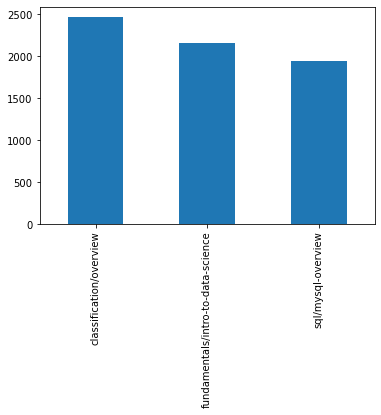

In [134]:
ds_df.endpoint.value_counts().head(3).plot(kind = 'bar')

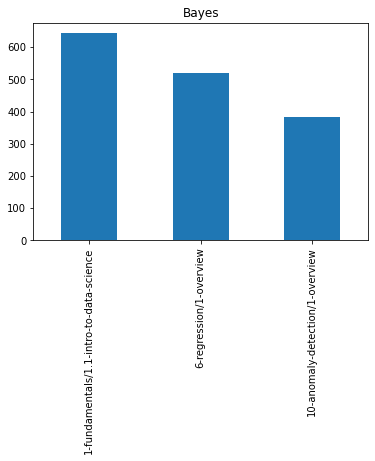

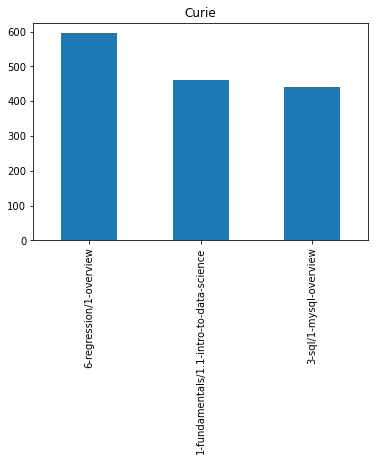

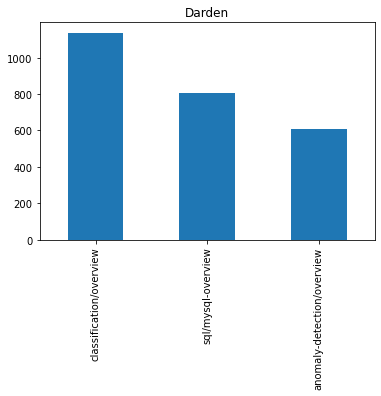

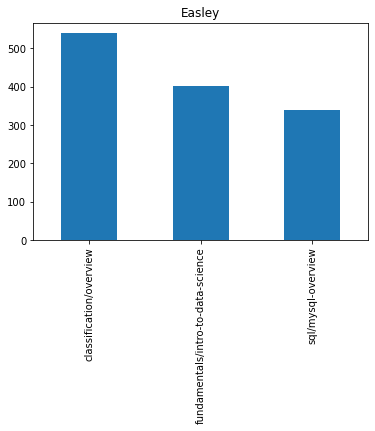

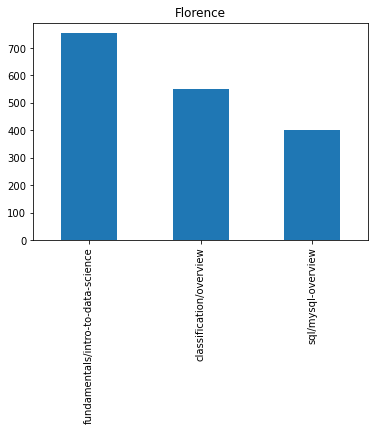

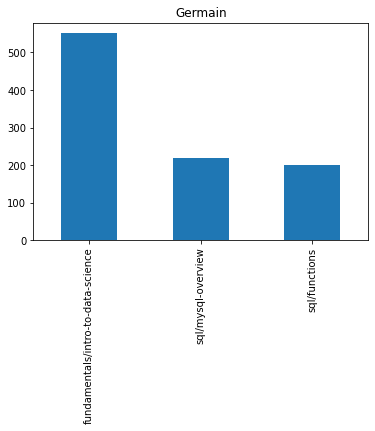

In [141]:
plt.figure()

for cohort in df_cohorts:
    
    ds_df[ds_df.name == cohort].endpoint.value_counts().head(3).plot(kind = 'bar')

    plt.title(f'{cohort}')
    
    plt.show()

In [ ]:
top_endpoints = []

In [146]:
# top 10 viewed pages by data science students
df7[df7.program_id == 3].endpoint.value_counts().head(10)

classification/overview                     2469
fundamentals/intro-to-data-science          2164
sql/mysql-overview                          1943
1-fundamentals/1.1-intro-to-data-science    1738
6-regression/1-overview                     1124
anomaly-detection/overview                  1098
stats/compare-means                          972
python/data-types-and-variables              890
classification/evaluation                    858
classification/explore                       832
Name: endpoint, dtype: int64

In [149]:
top_ds_lessons = list(df7[df7.program_id == 3].endpoint.value_counts().head(10).index)

In [170]:
top_endpoint_ds_df = ds_df[ds_df['endpoint'].isin(top_ds_lessons) == True]

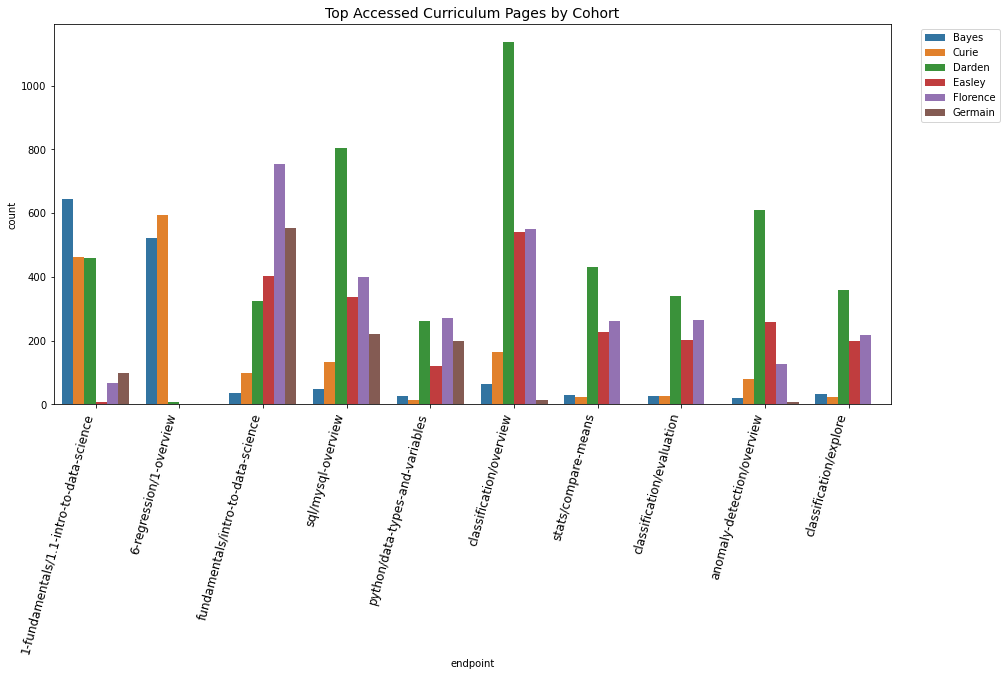

In [179]:
plt.figure(figsize = (15,7))
sns.countplot(data = top_endpoint_ds_df, x = 'endpoint', hue = 'name')
plt.xticks(rotation = 75, fontsize = 12, ha = 'right')
plt.legend(bbox_to_anchor= (1.03, 1) )
plt.title('Top Accessed Curriculum Pages by Cohort', fontsize = 14)
plt.show()

In [90]:
#plt.figure(figsize = (16,5))
#sns.countplot(ds_df.endpoint, hue = ds_df.name)
#plt.xticks(rotation = 90)
#plt.show()

<AxesSubplot:xlabel='endpoint,name'>

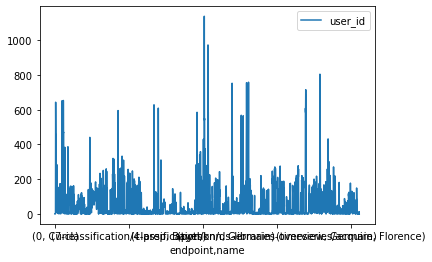

In [84]:
ds_df[['endpoint', 'name','user_id']].groupby(['endpoint', 'name']).count().plot()

In [36]:
len(web_cohorts)

29

In [34]:
web_cohorts = list(df2[df.program_id == 2].name.unique())
web_cohorts

['Teddy',
 'Sequoia',
 'Niagara',
 'Pinnacles',
 'Mammoth',
 'Ulysses',
 'Voyageurs',
 'Wrangell',
 'Xanadu',
 'Yosemite',
 'Staff',
 'Zion',
 'Andromeda',
 'Betelgeuse',
 'Ceres',
 'Deimos',
 'Europa',
 'Fortuna',
 'Apex',
 'Ganymede',
 'Hyperion',
 'Bash',
 'Jupiter',
 'Kalypso',
 'Luna',
 'Marco',
 'Neptune',
 'Oberon',
 'Draco']

In [101]:
# filter out table of contents
df3 = df2[df.endpoint != 'toc']

# filter out anything with the word search
df4 = df3[df3.endpoint.str.contains('search') != True]

In [104]:
for cohort in web_cohorts:
    cohort_df = pd.DataFrame(df4).groupby('name')['endpoint'].value_counts()
    cohort_df = cohort_df[cohort_df > 3]
    cep_df = cohort_df.loc[[cohort]]
    cep_df = cep_df.nlargest(6)
    print(cep_df)
    print('\n')

name   endpoint    
Teddy  spring          754
       java-iii        737
       mysql           641
       javascript-i    637
       java-i          526
       jquery          520
Name: endpoint, dtype: int64


name     endpoint                        
Sequoia  spring                              364
         spring/fundamentals/views           207
         javascript-i                        202
         spring/fundamentals/controllers     190
         spring/fundamentals/repositories    172
         appendix                            170
Name: endpoint, dtype: int64


name     endpoint     
Niagara  spring           65
         index.html       63
         java-iii         29
         mysql            24
         javascript-i     23
         javascript-ii    21
Name: endpoint, dtype: int64


name       endpoint     
Pinnacles  javascript-i     69
           spring           61
           javascript-ii    58
           java-i           57
           html-css         56
           j

### Takeaways Most Accessed Lessons Web Development Cohorts

The top accessed lessons by web development cohorts are:
- Javascript i
- Java ii
- Java iii
- html-css
- jquery
- spring

Several of the cohorts also accessed this page frequently
- my_SQL

Ganymede had appendix in their top 6. After further investigation, after the staff, they are the cohort that has accessed the appendix the most.

In [202]:
# filter for web dev students
web_df = df[df.program_id == 2]

In [203]:
# create top features
filter_endpoints(web_df).endpoint.value_counts().head(10) 

javascript-i     19383
java-iii         14155
html-css         13827
java-ii          13588
spring           12696
jquery           12012
java-i           11572
mysql            11446
javascript-ii    10726
appendix          8083
Name: endpoint, dtype: int64

In [205]:
top_web_endpoints = list(filter_endpoints(web_df).endpoint.value_counts().head(10).index)

In [206]:
# filter df for top features
top_endpoints_web_df =  web_df[web_df['endpoint'].isin(top_web_endpoints) == True]

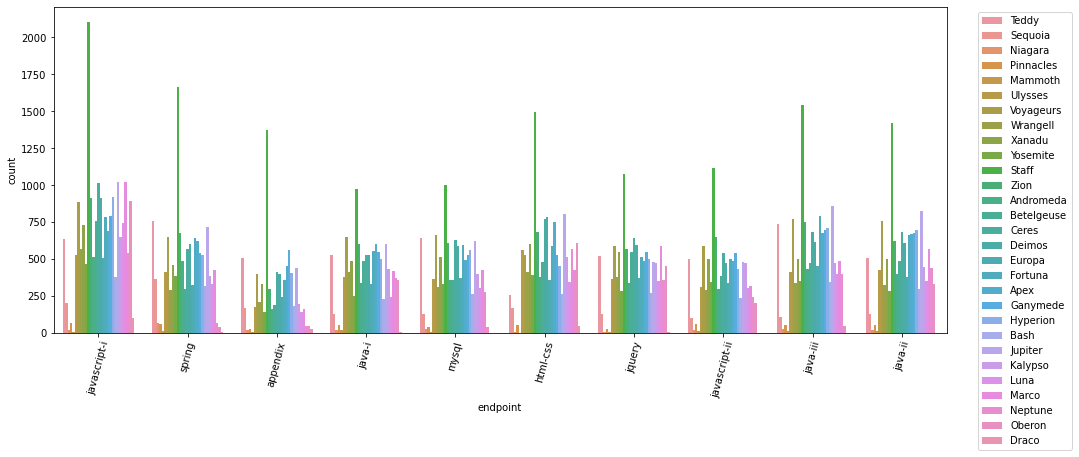

In [207]:
# graph counts
plt.figure(figsize = (16,6))
sns.countplot(data = top_endpoints_web_df, x = 'endpoint', hue = 'name')
plt.xticks(rotation = 75)
plt.legend(bbox_to_anchor= (1.03, 1) )
plt.show()

#### This graph is cool however it's too busy
- Will try and filter cohorts into years. Easier to look at


In [216]:
import prepare as p

In [257]:
df = get_joined_curriculum_data()

In [258]:
df = p.make_datetime(df, 'start_date')

In [284]:
years = [2016, 2017, 2018, 2019, 2020, 2021]



In [276]:
web_df = df[df.program_id == 2]

In [287]:
web_df[web_df['start_date'].dt.year == 2016]['name'].value_counts()

Niagara    755
Mammoth    691
Name: name, dtype: int64

In [296]:
students = {}
for year in years:
    students[year] = list(web_df[web_df['start_date'].dt.year == year]\
         ['name'].value_counts().index)

In [297]:
students

{2016: ['Niagara', 'Mammoth'],
 2017: ['Sequoia', 'Pinnacles'],
 2018: ['Voyageurs', 'Teddy', 'Ulysses', 'Xanadu', 'Wrangell', 'Yosemite'],
 2019: ['Ceres', 'Zion', 'Deimos', 'Betelgeuse', 'Europa', 'Andromeda'],
 2020: ['Jupiter',
  'Fortuna',
  'Ganymede',
  'Apex',
  'Hyperion',
  'Kalypso',
  'Luna',
  'Bash'],
 2021: ['Marco', 'Neptune', 'Oberon', 'Draco']}

In [349]:
for x in students:
    print(students[x])
    print(x)

['Niagara', 'Mammoth']
2016
['Sequoia', 'Pinnacles']
2017
['Voyageurs', 'Teddy', 'Ulysses', 'Xanadu', 'Wrangell', 'Yosemite']
2018
['Ceres', 'Zion', 'Deimos', 'Betelgeuse', 'Europa', 'Andromeda']
2019
['Jupiter', 'Fortuna', 'Ganymede', 'Apex', 'Hyperion', 'Kalypso', 'Luna', 'Bash']
2020
['Marco', 'Neptune', 'Oberon', 'Draco']
2021


In [330]:
students.keys()

dict_keys([2016, 2017, 2018, 2019, 2020, 2021])

In [314]:
df[df.name.isin(['Niagara', 'Mammoth'])]

,date,endpoint,user_id,cohort_id,source_ip,id,name,start_date,end_date,program_id
72,2018-01-26,index.html,21,16.0,71.137.146.71,16.0,Niagara,2016-10-26,2017-03-09,2.0
73,2018-01-26,java-i,21,16.0,71.137.146.71,16.0,Niagara,2016-10-26,2017-03-09,2.0
254,2018-01-26,spring/extra-features/file-upload,40,16.0,97.105.19.61,16.0,Niagara,2016-10-26,2017-03-09,2.0
1067,2018-01-29,jquery,40,16.0,97.105.19.61,16.0,Niagara,2016-10-26,2017-03-09,2.0
1068,2018-01-29,jquery/ajax,40,16.0,97.105.19.61,16.0,Niagara,2016-10-26,2017-03-09,2.0
...,...,...,...,...,...,...,...,...,...,...
755307,2020-12-08,/,143,16.0,68.201.242.151,16.0,Niagara,2016-10-26,2017-03-09,2.0
755311,2020-12-08,toc,143,16.0,68.201.242.151,16.0,Niagara,2016-10-26,2017-03-09,2.0
755312,2020-12-08,toc,143,16.0,68.201.242.151,16.0,Niagara,2016-10-26,2017-03-09,2.0
755313,2020-12-08,appendix,143,16.0,68.201.242.151,16.0,Niagara,2016-10-26,2017-03-09,2.0


In [317]:
top_endpoints_web_df =  web_df[web_df['endpoint'].isin(top_web_endpoints) == True]

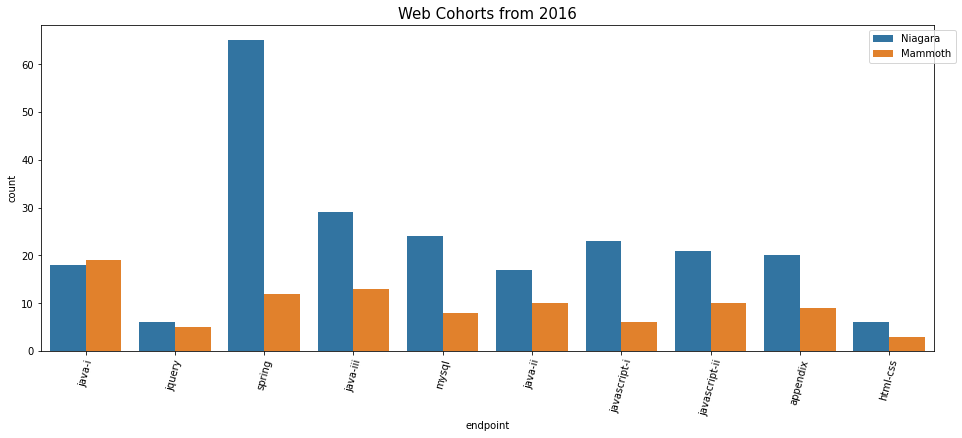

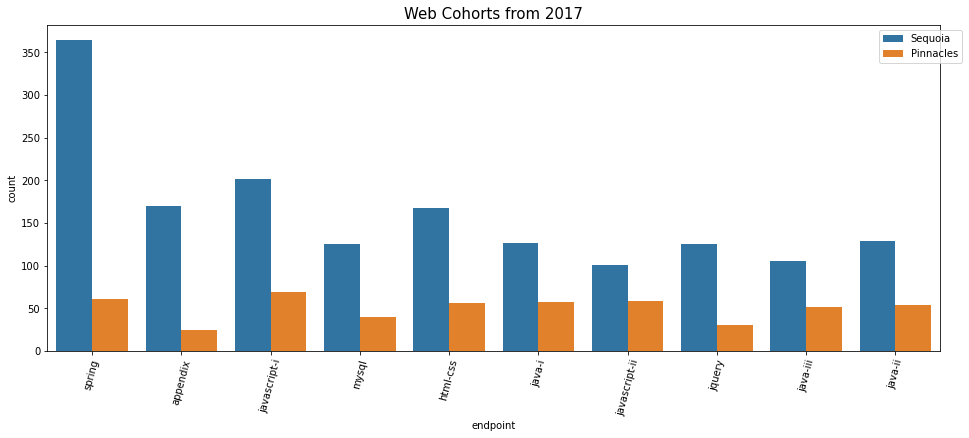

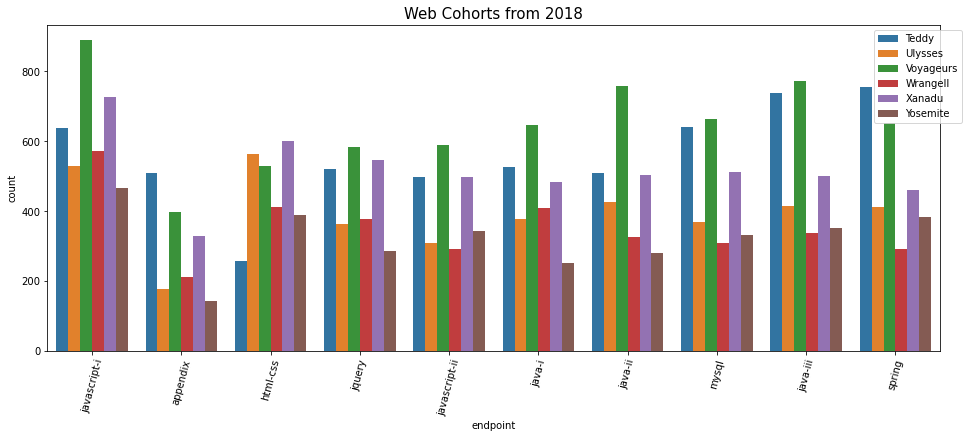

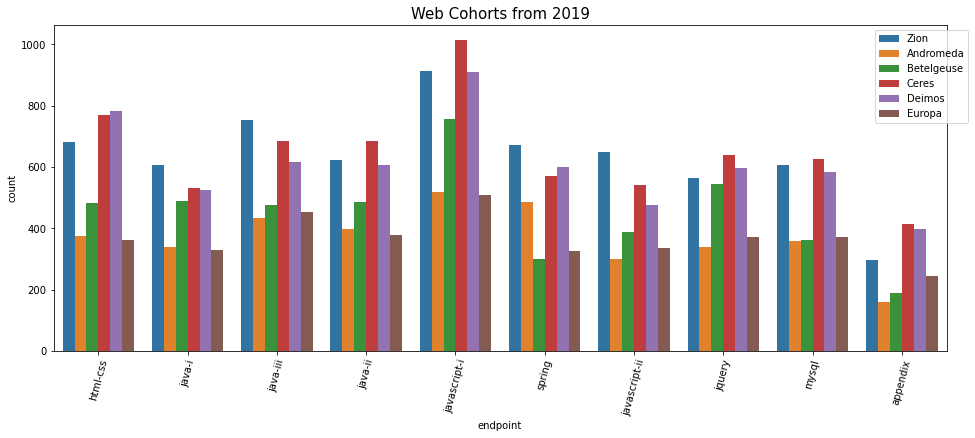

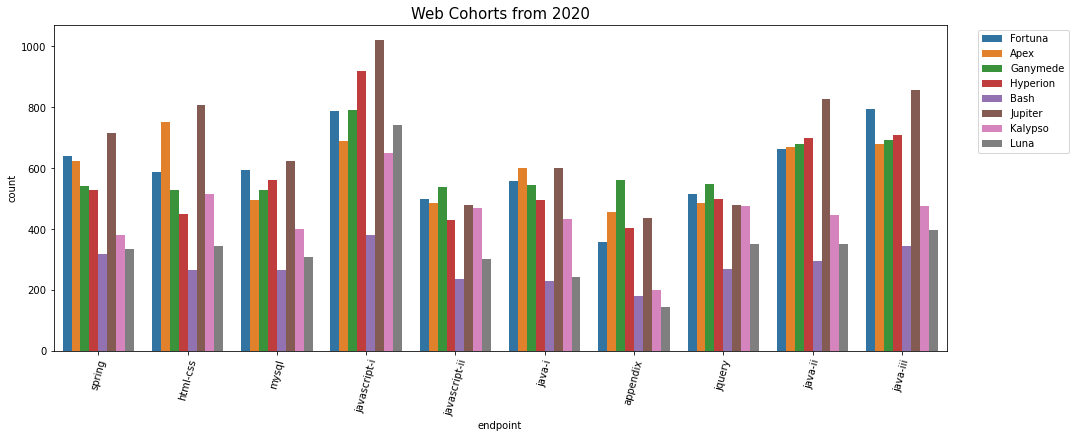

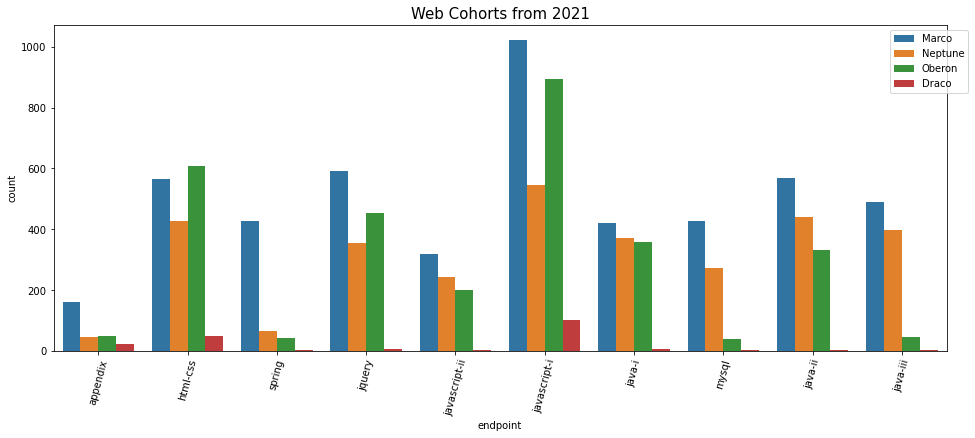

In [351]:
for x in students:
    
    df_plot = top_endpoints_web_df[top_endpoints_web_df.name.isin(students[x])]
    
    plt.figure(figsize = (16,6))
    sns.countplot(data = df_plot, x = 'endpoint', hue = 'name')
    plt.xticks(rotation = 75)
    plt.legend(bbox_to_anchor= (1.03, 1) )
    plt.title(f'Web Cohorts from {x}', fontsize = 15)
    plt.show()

In [114]:
df[df.endpoint.str.contains('appendix') == True].groupby('name').count().sort_values('endpoint', ascending = False)

,date,endpoint,user_id,cohort_id,source_ip,id,start_date,end_date,program_id
name,,,,,,,,,
Staff,5343,5343,5343,5343,5343,5343,5343,5343,5343
Ganymede,2072,2072,2072,2072,2072,2072,2072,2072,2072
Apex,2054,2054,2054,2054,2054,2054,2054,2054,2054
Jupiter,1777,1777,1777,1777,1777,1777,1777,1777,1777
Teddy,1634,1634,1634,1634,1634,1634,1634,1634,1634
Ceres,1528,1528,1528,1528,1528,1528,1528,1528,1528
Fortuna,1503,1503,1503,1503,1503,1503,1503,1503,1503
Voyageurs,1443,1443,1443,1443,1443,1443,1443,1443,1443
Deimos,1392,1392,1392,1392,1392,1392,1392,1392,1392


### Filtering out endpoints
I need to figure out how to do the following steps in one shot
```python
df2 = df[df.endpoint != '/']
# filter out table of contents
df3 = df2[df.endpoint != 'toc']

# filter out anything with the word search
df4 = df3[df3.endpoint.str.contains('search') != True]

# filter out all the image endpoints (couldn't figure out how to do it in one shot)
df5 = df4[df4.endpoint.str.contains('.jpg') != True]

df6 = df5[df5.endpoint.str.contains('.jpeg') != True]

df7 = df6[df6.endpoint.str.contains('.svg') != True]
```

In [ ]:
df2 = df[df.endpoint != '/']
# filter out table of contents
df3 = df2[df.endpoint != 'toc']

# filter out anything with the word search
df4 = df3[df3.endpoint.str.contains('search') != True]
# filter out all the image endpoints (couldn't figure out how to do it in one shot)
df5 = df4[df4.endpoint.str.contains('.jpg') != True]

df6 = df5[df5.endpoint.str.contains('.jpeg') != True]

df7 = df6[df6.endpoint.str.contains('.svg') != True]

In [186]:
# ok Will need to do this in two steps 
# step one get rid of endpoints that are only '/'
df2 = df[df.endpoint != '/']


# step 2 get rid of everything tat contains the following
df2[df2.endpoint.str.contains('toc|search|jpg|jpeg|svg') == False]

,date,endpoint,user_id,cohort_id,source_ip,id,name,start_date,end_date,program_id
1,2018-01-26,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
5,2018-01-26,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...,...,...
1018804,2021-07-15,python/intro-to-matplotlib,11,28.0,97.105.19.60,28.0,Staff,2014-02-04,2014-02-04,2.0
1018806,2021-07-15,java-iii/finish-the-adlister,925,138.0,24.26.246.133,138.0,Neptune,2021-03-15,2021-09-03,2.0
1018807,2021-07-15,java-ii/arrays,933,138.0,72.190.28.51,138.0,Neptune,2021-03-15,2021-09-03,2.0
1018808,2021-07-15,java-ii/object-oriented-programming,933,138.0,72.190.28.51,138.0,Neptune,2021-03-15,2021-09-03,2.0


In [187]:
# this is in the prepare file
def filter_endpoints(df):
    '''
    This function filters out the following endpoints
    /
    toc
    contains the following strings: search, jpg, jpeg, svg
    Returns the dataframe with those endpoints removed
    '''
    # step one get rid of endpoints that are only '/'
    df2 = df[df.endpoint != '/']

    # step 2 get rid of everything tat contains the following
    df_final = df2[df2.endpoint.str.contains('toc|search|jpg|jpeg|svg') == False]
    
    return df_final

In [188]:
test_df = filter_endpoints(df)